# <center>Stock Price Prediction on TCS Dataset<center>

# Group Members
A Badarinadh reddy - 17305 <br>
M Vinith - 17335 <br>
Vishnu dutt - 17336 <br>
T Kiran Mallikarjun - 17362


# Problem Definition
To analyse and predict the stock price using different algorithms.

# DataSet Description
The data is the price history and trading volumes of the fifty stocks in the index NIFTY 50 from NSE (National Stock Exchange) India. dataset is at a day-level with pricing and trading values for each stock . The data spans from 1st January, 2000 to 31st July, 2020.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
#importing all necessary packages

In [2]:
df = pd.read_csv("TCS.csv" )
#importing the dataset into a dataframe

# EDA

In [3]:
df.head(5)
#first 5 rows of the dataframe

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2004-08-25,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,NaN,5206360,0.3042
1,2004-08-26,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982865e+14,NaN,1294899,0.2561
2,2004-08-27,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715586e+14,NaN,976527,0.2549
3,2004-08-30,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005106e+14,NaN,701664,0.2294
4,2004-08-31,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602133e+14,NaN,695234,0.2624


In [4]:
df.isnull().any()
#check if there are any null values in the dataframe 

Date                  False
Symbol                False
Series                False
Prev Close            False
Open                  False
High                  False
Low                   False
Last                  False
Close                 False
VWAP                  False
Volume                False
Turnover              False
Trades                 True
Deliverable Volume    False
%Deliverble           False
dtype: bool

<b>Inference:</b><br>
There are no null values in the dataframe

In [5]:
df.shape
#number of rows,number of columns in the dataset

(3974, 15)

In [6]:
df.dtypes
#datatypes of the attributes

Date                   object
Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume      int64
%Deliverble           float64
dtype: object

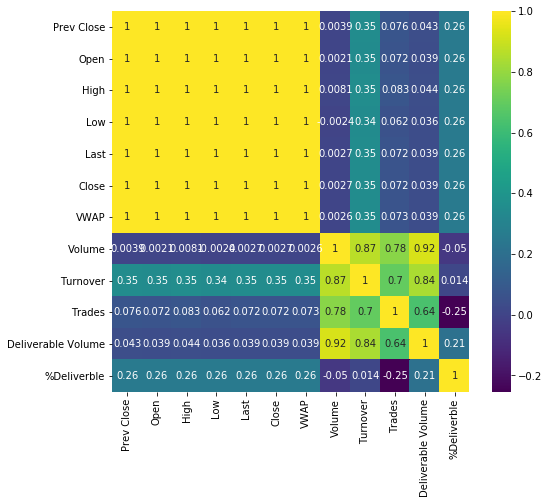

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
c=df.corr()
sns.heatmap(c,cmap="viridis",annot=True);
#To check for the features which plays a important role in prediction

<b>Inference:</b><br>
The features,<br>
<li>Prev Close <br>
<li>Open<br>
<li>High<br>
<li>Low<br>
<li>Last<br>
<li>Close<br>
<li>VWAP are highly related to the prediction values.

In [8]:
df_final=df.drop(["Volume",'Trades','Symbol','Series','Turnover','Deliverable Volume','%Deliverble'],axis=1)
#dropping less relavent attributes

In [9]:
df_final
#the final dataset

,Date,Prev Close,Open,High,Low,Last,Close,VWAP
0,2004-08-25,850.00,1198.7,1198.70,979.00,985.00,987.95,1008.32
1,2004-08-26,987.95,992.0,997.00,975.30,976.85,979.00,985.65
2,2004-08-27,979.00,982.4,982.40,958.55,961.20,962.65,969.94
3,2004-08-30,962.65,969.9,990.00,965.00,986.40,986.75,982.65
4,2004-08-31,986.75,986.5,990.00,976.00,987.80,988.10,982.18
...,...,...,...,...,...,...,...,...
3969,2020-08-25,2248.10,2245.0,2250.00,2233.55,2242.00,2242.65,2242.51
3970,2020-08-26,2242.65,2242.0,2259.90,2216.45,2257.00,2253.50,2237.68
3971,2020-08-27,2253.50,2266.0,2287.35,2241.75,2250.00,2248.40,2265.38
3972,2020-08-28,2248.40,2268.4,2279.95,2235.10,2238.25,2238.55,2248.99


In [10]:
df_final.shape
#number of rows,columns in the dataset

(3974, 8)

In [11]:
df_final.describe().transpose()
#5 point summary of the dataset

,count,mean,std,min,25%,50%,75%,max
Prev Close,3974.0,1644.633493,692.957512,366.65,1090.9125,1494.375,2251.4125,3603.70
Open,3974.0,1646.182574,692.704154,360.00,1093.6125,1494.550,2251.8000,3625.00
High,3974.0,1665.955247,697.731834,377.75,1108.5500,1509.300,2274.4375,3674.80
Low,3974.0,1624.691054,688.073523,358.00,1075.6500,1477.025,2225.7625,3572.55
Last,3974.0,1644.884524,692.961020,365.70,1092.2500,1494.425,2249.9875,3610.75
Close,3974.0,1644.987607,692.910902,366.65,1091.2750,1496.150,2251.8250,3603.70
VWAP,3974.0,1645.204819,692.939163,368.40,1091.9625,1496.700,2250.6875,3633.11


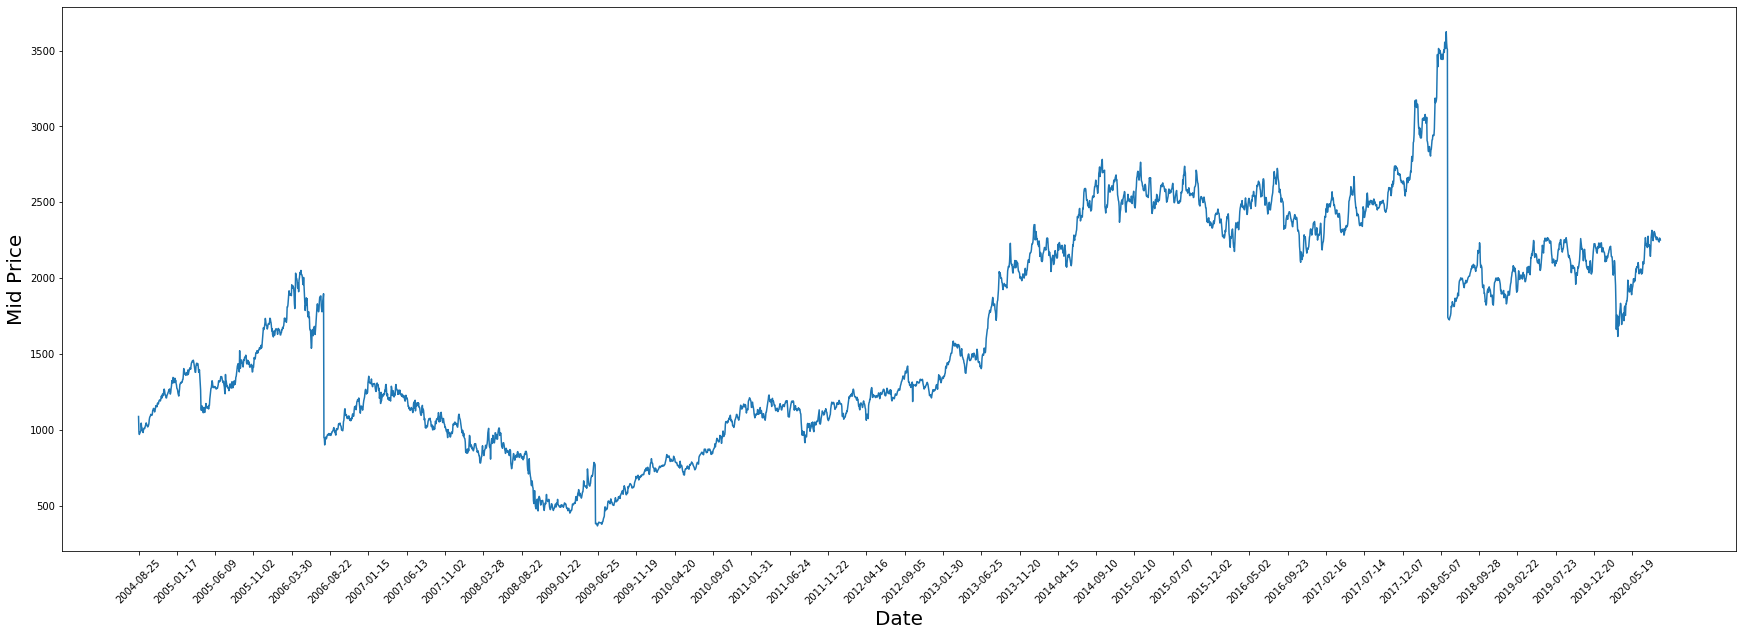

In [12]:
plt.figure(figsize = (30,10))
plt.plot(range(df_final.shape[0]),(df_final['Low']+df_final['High'])/2.0)
plt.xticks(range(0,df_final.shape[0],100),df_final['Date'].loc[::100],rotation=45)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Mid Price',fontsize=20)
plt.show()
#to find the relation between mid price wrt date

<b>Inference:</b><br>
The Mid price ranges are not linear wrt the dates.

In [13]:
df_final.columns
#features in the dataset

Index(['Date', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP'], dtype='object')

In [14]:
#independent variables
feature_columns = ['Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP']

# Normalizing the data

In [15]:
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(df_final[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=df_final.index)
feature_minmax_transform.head()
#min-max normalization

,Prev Close,Open,High,Low,Last,Close,VWAP
0,0.149318,0.256876,0.248995,0.193184,0.190845,0.191934,0.196011
1,0.191934,0.193568,0.187819,0.192033,0.188333,0.189169,0.189067
2,0.189169,0.190628,0.183391,0.186822,0.183510,0.184118,0.184255
3,0.184118,0.186799,0.185696,0.188829,0.191276,0.191563,0.188148
4,0.191563,0.191884,0.185696,0.192251,0.191707,0.191980,0.188004


In [16]:
test=df_final

In [17]:
target_adj_close = pd.DataFrame(test['Open'])
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)

# Shift target array because we want to predict the n + 1 day value
target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-90:-1]
target_adj_close = target_adj_close[:-90]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)
display(target_adj_close.tail())

,Prev Close,Open,High,Low,Last,Close,VWAP
0,0.149318,0.256876,0.248995,0.193184,0.190845,0.191934,0.196011
1,0.191934,0.193568,0.187819,0.192033,0.188333,0.189169,0.189067
2,0.189169,0.190628,0.183391,0.186822,0.183510,0.184118,0.184255
3,0.184118,0.186799,0.185696,0.188829,0.191276,0.191563,0.188148
4,0.191563,0.191884,0.185696,0.192251,0.191707,0.191980,0.188004


Shape of features :  (3974, 7)
Shape of target :  (3974, 1)


,Prev Close,Open,High,Low,Last,Close,VWAP
3968,0.581378,0.579051,0.570874,0.582352,0.580746,0.581224,0.574829
3969,0.581224,0.577335,0.567856,0.583456,0.578204,0.579540,0.574051
3970,0.579540,0.576417,0.570859,0.578137,0.582826,0.582892,0.572572
3971,0.582892,0.583767,0.579184,0.586007,0.580669,0.581316,0.581056
3972,0.581316,0.584502,0.576940,0.583939,0.577048,0.578273,0.576036


,Open
3968,2245.0
3969,2242.0
3970,2266.0
3971,2268.4
3972,2240.0



 -----After process------ 

Shape of features :  (3884, 7)
Shape of target :  (3884, 1)


,Open
3879,1830.00
3880,1765.00
3881,1737.65
3882,1780.00
3883,1840.70


# Algorithms

# Linear Regression Model

<b>Building the model

In [18]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.20)

<b>Training the model

In [19]:
from sklearn.linear_model import LinearRegression
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))
# The Intercept
print('Intercept: ', model.intercept_)

Slope:  0.4283342526608211
Intercept:  796.0073976630509


/home/hp/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  import sys


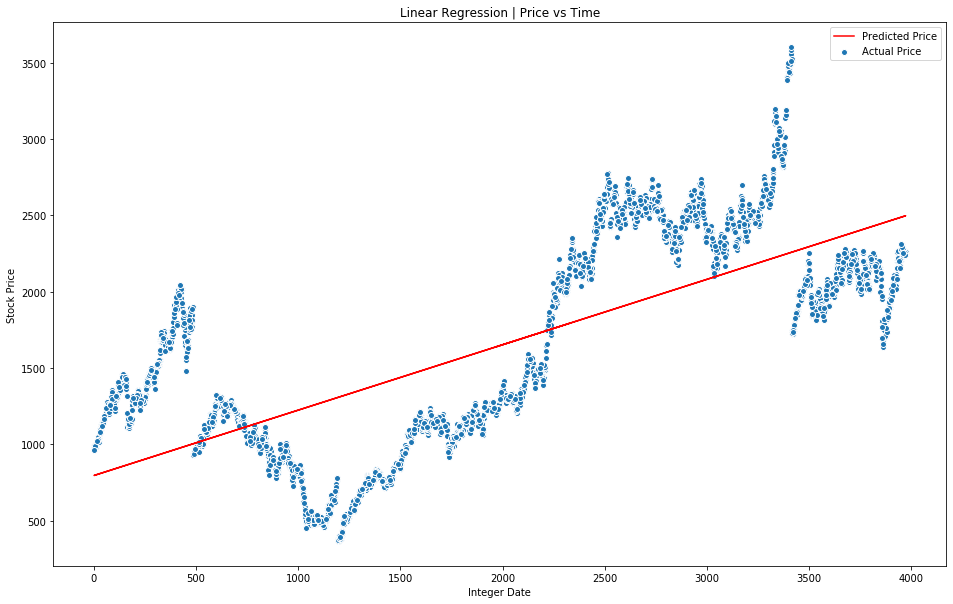

In [20]:
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [21]:
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']

In [22]:
y_pred = model.predict(X_test)

In [23]:
randints = np.random.randint(2550, size=25)

# Select row numbers == random numbers
df_sample = df[df.index.isin(randints)]
df_sample.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
209,2005-06-22,TCS,EQ,1305.10,1309.00,1339.0,1309.00,1333.00,1333.35,1327.29,1442172,1.914184e+14,NaN,805844,0.5588
273,2005-09-23,TCS,EQ,1401.45,1400.35,1429.8,1400.35,1412.00,1412.45,1418.21,476978,6.764560e+13,NaN,156279,0.3276
318,2005-11-30,TCS,EQ,1545.35,1532.00,1552.5,1515.00,1524.95,1521.10,1537.24,502922,7.731093e+13,NaN,263390,0.5237
445,2006-06-06,TCS,EQ,1767.60,1744.80,1787.8,1690.00,1746.00,1748.90,1739.11,371392,6.458910e+13,NaN,161225,0.4341
479,2006-07-21,TCS,EQ,1806.15,1798.00,1804.8,1752.60,1772.25,1767.55,1767.04,548958,9.700328e+13,NaN,202915,0.3696


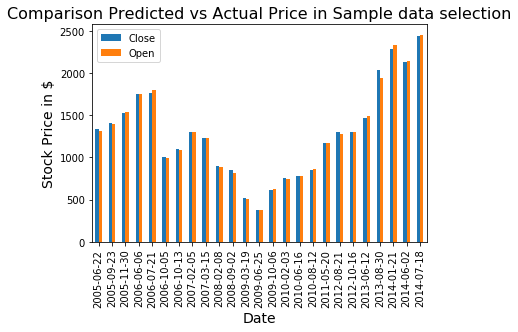

In [24]:
fig, ax = plt.subplots()
df_sample.plot(x='Date', y=['Close', 'Open'], kind='bar', ax=ax)

# Set figure title
plt.title('Comparison Predicted vs Actual Price in Sample data selection', fontsize=16)

# 

# Set x label
plt.xlabel('Date', fontsize=14)

# Set y label
plt.ylabel('Stock Price in $', fontsize=14)

# Show plot
plt.show()

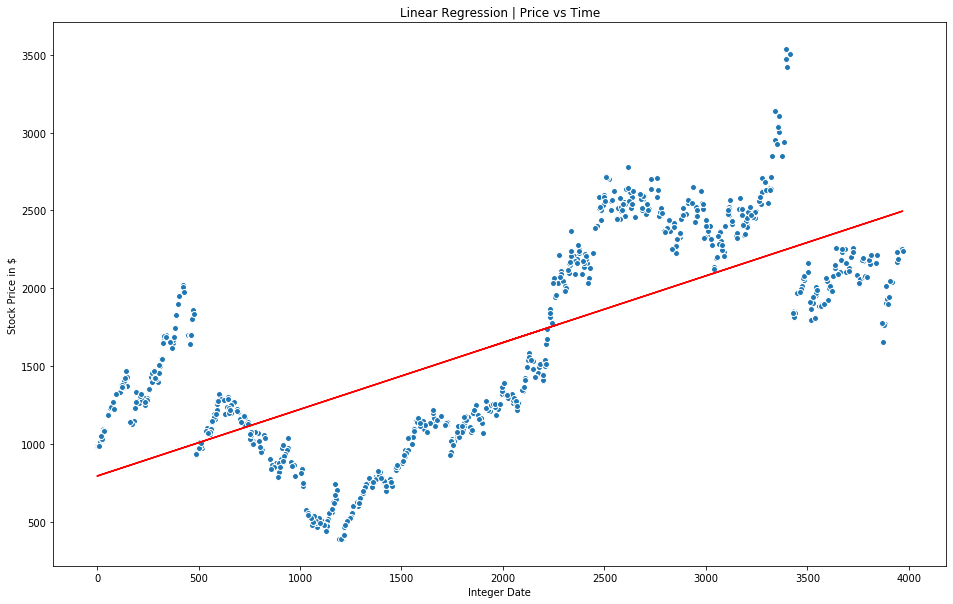

In [25]:
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.plot(X_test, model.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, edgecolor='w', label='Actual Price')

plt.xlabel('Integer Date')
plt.ylabel('Stock Price in $')

plt.show()

<b>Testing and prediction of output

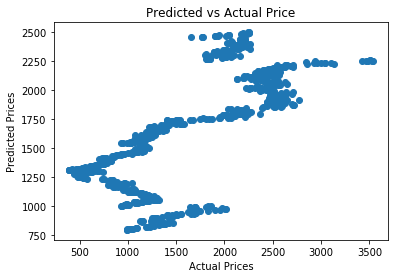

In [26]:
plt.scatter(y_test, y_pred)

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.title('Predicted vs Actual Price')

plt.show()

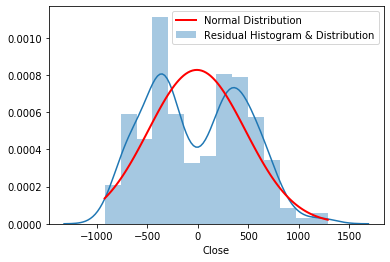

In [27]:
from scipy.stats import norm
import seaborn as sns

# Fit a normal distribution to the data:
mu, std = norm.fit(y_test - y_pred)

ax = sns.distplot((y_test - y_pred), label='Residual Histogram & Distribution')

# Calculate the pdf over a range of values         
x = np.linspace(min(y_test - y_pred), max(y_test - y_pred), 100)
p = norm.pdf(x, mu, std)

# And plot on the same axes that seaborn put the histogram
ax.plot(x, p, 'r', lw=2, label='Normal Distribution') 

plt.legend()
plt.show()

In [28]:
df['Prediction'] = model.predict(np.array(df.index).reshape(-1, 1))

In [29]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Prediction
0,2004-08-25,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,NaN,5206360,0.3042,796.007398
1,2004-08-26,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982865e+14,NaN,1294899,0.2561,796.435732
2,2004-08-27,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715586e+14,NaN,976527,0.2549,796.864066
3,2004-08-30,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005106e+14,NaN,701664,0.2294,797.292400
4,2004-08-31,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602133e+14,NaN,695234,0.2624,797.720735


In [30]:
from sklearn import metrics
df['Close'].describe()

count    3974.000000
mean     1644.987607
std       692.910902
min       366.650000
25%      1091.275000
50%      1496.150000
75%      2251.825000
max      3603.700000
Name: Close, dtype: float64

<b>Accuracy of the Model

In [31]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),5))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),5))  
print("Median absolute error =", round(metrics.median_absolute_error(y_test, y_pred), 5)) 
print("Explain variance score =", round(metrics.explained_variance_score(y_test, y_pred), 5))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2: ', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 426.46594
Mean Squared Error: 232434.91809
Median absolute error = 394.37406
Explain variance score = 0.53237
Root Mean Squared Error: 482.11504653253024
R2:  0.5321912724913496


# DecisionTreeRegressor Model

<b>Train test Split using Timeseriessplit

In [32]:
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()
#spliting the dataset for training and testing

In [33]:
X_train.shape

(3531, 7)

In [34]:
X_test.shape

(353, 7)

In [35]:
def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()
#function returns the rmse,r**2,plot of the model

RMSE:  24.39648908706497
R2 score:  0.9683441013026047


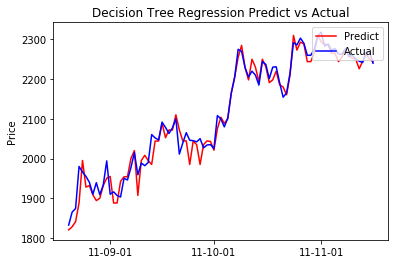

In [36]:
import matplotlib.dates as mdates
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)

benchmark_dt=dt.fit(X_train, y_train)

validate_result(benchmark_dt, 'Decision Tree Regression')
#fitting and predicting using DTR

# LSTM Model

<b>Process the data for LSTM</b>

In [37]:
X_train =np.array(X_train)
X_test =np.array(X_test)

X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
#using the train test split

<b>Model building : LSTM

In [38]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(16, input_shape=(1, X_train.shape[1]), activation='relu', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, batch_size=8, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/200
442/442 [==============================] - 1s 2ms/step - loss: 3008100.7500
Epoch 2/200
442/442 [==============================] - 1s 2ms/step - loss: 2909102.0000
Epoch 3/200
442/442 [==============================] - 1s 2ms/step - loss: 2765943.5000
Epoch 4/200
442/442 [==============================] - 1s 3ms/step - loss: 2584824.5000
Epoch 5/200
442/442 [==============================] - 1s 2ms/step - loss: 2375293.7500
Epoch 6/200
442/442 [==============================] - 1s 2ms/step - loss: 2146438.2500
Epoch 7/200
442/442 [==============================] - 1s 3ms/step - loss: 1906438.0000
Epoch 8/200
442/442 [==============================] - 1s 2ms/step - loss: 1662554.8750
Epoch 9/200
442/442 [==============================] - 1s 2ms/step - loss: 1421244.3750
Epoch 10/200
442/442 [==============================] - 1s 3ms/step - loss: 1188239.7500
Epoch 11/200
442/442 [==============================] - 1s 2ms/step - loss: 968616.2500
Epoch 12/200
442/442 [=========

<b>Evaluation of Model

In [39]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)

predicted = model_lstm.predict(X_tst_t)
RSME_score = np.sqrt(mean_squared_error(y_test, predicted))
print('RMSE: ', RSME_score)

The R2 score on the Test set is:	0.976
RMSE:  22.305317574500684


<b>Predictions made by LSTM

In [40]:
score_lstm= model_lstm.evaluate(X_tst_t, y_test, batch_size=1)

353/353 [==============================] - 1s 2ms/step - loss: 497.5275


In [41]:
print('LSTM: %f'%score_lstm)

LSTM: 497.527527


<b>LSTM's Prediction Visual

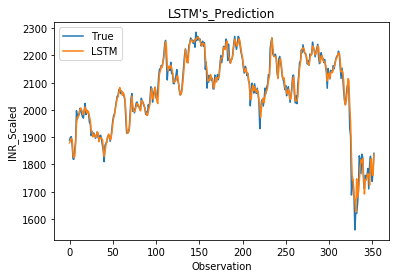

In [42]:
plt.plot(y_test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()

# Result Discussion

<tr>
    <td><b>S.No</b></td>
    <td><b>Algorithm</b></td>
    <td><b>RMSE</b></td>
    <td><b>R2 Score</b></td>
    <td><b>Rank</b></td>
</tr>
<tr>
    <td>1</td>
    <td>Linear Regression</td>
    <td>492.72</td>
    <td>0.50</td>
    <td>3</td>
</tr>
<tr>
    <td>2</td>
    <td>Desicion tree Regression</td>
    <td>24.39648908706497</td>
    <td>0.9683</td>
    <td>2</td>
</tr>
<tr>
    <td>3</td>
    <td>LSTM</td>
    <td>22.377313327600252</td>
    <td>0.975</td>
    <td>1</td>
</tr>

# Conclusion

Hence according to the Performance evaluated from different classifiers,we find that the LSTM classifier predicts values with more accuracy.Although the accuracy is not perfect, it can still be increased with other regression algorithm in future.

# Refernces

1.https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/<br>
2.https://towardsdatascience.com/stock-price-prediction-based-on-deep-learning-3842ef697da0<br>
3.https://www.kaggle.com/rohanrao/nifty50-stock-market-data?select=TCS.csv